In [163]:
#OBJECTIVE: Mencari tau feature yang paling berpengaruh terhadap DeathRatePer100K

In [227]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

## Load Data

In [165]:
full_data = pd.read_csv("datasets/suicide_rates_1990-2022.csv")

In [166]:
japan_suicide_full_data = full_data.loc[full_data["CountryName"]=="Japan"]

japan_suicide_full_data

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
44780,AS,Asia,JPN,Japan,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44781,AS,Asia,JPN,Japan,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44782,AS,Asia,JPN,Japan,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44783,AS,Asia,JPN,Japan,1990,Male,0-14 years,Generation Alpha,30.0,3.947368,0.688358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44784,AS,Asia,JPN,Japan,1990,Male,15-24 years,Generation Z,244.0,7.615481,4.776821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117415,AS,Asia,JPN,Japan,2021,Female,55-74 years,Baby Boomers,615.0,1.438159,12.108330,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117416,AS,Asia,JPN,Japan,2021,Female,75+ years,Silent Generation,448.0,0.791198,12.099697,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117417,AS,Asia,JPN,Japan,2021,Female,75+ years,Silent Generation,376.0,0.403902,11.610120,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117418,AS,Asia,JPN,Japan,2021,Female,75+ years,Silent Generation,475.0,0.106595,10.909779,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362


In [167]:
japan_suicide_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 44780 to 117419
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    1280 non-null   object 
 1   RegionName                    1280 non-null   object 
 2   CountryCode                   1280 non-null   object 
 3   CountryName                   1280 non-null   object 
 4   Year                          1280 non-null   int64  
 5   Sex                           1280 non-null   object 
 6   AgeGroup                      1280 non-null   object 
 7   Generation                    1280 non-null   object 
 8   SuicideCount                  1280 non-null   float64
 9   CauseSpecificDeathPercentage  1280 non-null   float64
 10  DeathRatePer100K              1216 non-null   float64
 11  Population                    1240 non-null   float64
 12  GDP                           1240 non-null   float64
 13  GD

## Data cleansing

In [168]:
# Menghilangkan duplikasi pada dataset

japan_suicide_relevan_data = japan_suicide_full_data.drop_duplicates()

print("Jumlah row yang dihilangkan karena duplicate: ", japan_suicide_full_data.size-japan_suicide_relevan_data.size)

Jumlah row yang dihilangkan karena duplicate:  1998


In [169]:
# Kolom yang dihilangkan adalah yang jelas tidak relevan, tapi bukan berarti semua yang lolos memiliki pengaruh yang besar

unrelevan_columns = ["RegionCode", "RegionName", "CountryCode", "CountryName", "CauseSpecificDeathPercentage"]

japan_suicide_relevan_data = japan_suicide_relevan_data.drop(unrelevan_columns, axis=1)

japan_suicide_relevan_data

,Year,Sex,AgeGroup,Generation,SuicideCount,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
44780,1990,Male,0-14 years,Generation Alpha,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44783,1990,Male,0-14 years,Generation Alpha,30.0,0.688358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44784,1990,Male,15-24 years,Generation Z,244.0,4.776821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44785,1990,Male,15-24 years,Generation Z,631.0,14.219398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44786,1990,Male,25-34 years,Millennials,705.0,17.469088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117415,2021,Female,55-74 years,Baby Boomers,615.0,12.108330,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117416,2021,Female,75+ years,Silent Generation,448.0,12.099697,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117417,2021,Female,75+ years,Silent Generation,376.0,11.610120,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117418,2021,Female,75+ years,Silent Generation,475.0,10.909779,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362


In [170]:
japan_suicide_relevan_data.isnull().sum()

Year                          0
Sex                           0
AgeGroup                      0
Generation                    0
SuicideCount                  0
DeathRatePer100K             64
Population                   36
GDP                          36
GDPPerCapita                 36
GrossNationalIncome          36
GNIPerCapita                 36
InflationRate                36
EmploymentPopulationRatio    36
dtype: int64

### Drop row dengan "year = 1990"

In [171]:
test = japan_suicide_relevan_data.loc[:, ["Year", "Population"]].drop_duplicates()

print(test)

for i in range(1990, 2022):
    if i not in test["Year"].values:
        print("Tahun yang tidak ada: ", i)
    

        Year   Population
44780   1990          NaN
44820   1991  123964000.0
44860   1992  124425000.0
44900   1993  124829000.0
44940   1994  125178000.0
44980   1995  125472000.0
45020   1996  125757000.0
45060   1997  126057000.0
45100   1998  126400000.0
45140   1999  126631000.0
45180   2000  126843000.0
45220   2001  127149000.0
45260   2002  127445000.0
45300   2003  127718000.0
45340   2004  127761000.0
45365   2005  127773000.0
45420   2006  127854000.0
45460   2007  128001000.0
45500   2008  128063000.0
45540   2009  128047000.0
45580   2010  128070000.0
45620   2011  127833000.0
45660   2012  127629000.0
45700   2013  127445000.0
45740   2014  127276000.0
103420  2020  126261000.0
103460  2019  126633000.0
103500  2018  126811000.0
103540  2017  126972000.0
103580  2016  127076000.0
103620  2015  127141000.0
117380  2021  125681593.0


In [172]:
japan_suicide_relevan_data = japan_suicide_relevan_data[japan_suicide_relevan_data["Year"] != 1990]

japan_suicide_relevan_data.isnull().sum()

Year                          0
Sex                           0
AgeGroup                      0
Generation                    0
SuicideCount                  0
DeathRatePer100K             62
Population                    0
GDP                           0
GDPPerCapita                  0
GrossNationalIncome           0
GNIPerCapita                  0
InflationRate                 0
EmploymentPopulationRatio     0
dtype: int64

##### Dari tabel di atas, bisa dibuktikan bahwa dengan menghapus row dengan tahun 1990, maka tidak ada lagi nilai NaN pada field field yang berhubungan dengan perekonomian, yaitu "Population" hingga "EmploymentPopulationRation".


### Drop row dengan "AgeGroup = Unknown" atau "Generation = Unknown"

In [177]:
japan_suicide_relevan_data = japan_suicide_relevan_data[(japan_suicide_relevan_data["AgeGroup"]!="Unknown") | (japan_suicide_relevan_data["Generation"]!="Unknown")]

japan_suicide_relevan_data

,Year,Sex,AgeGroup,Generation,SuicideCount,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
44820,1991,Male,0-14 years,Generation Alpha,0.0,0.000000,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44823,1991,Male,0-14 years,Generation Alpha,22.0,0.524184,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44824,1991,Male,15-24 years,Generation Z,247.0,4.896907,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44825,1991,Male,15-24 years,Generation Z,644.0,13.626746,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44826,1991,Male,25-34 years,Millennials,723.0,18.207001,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117414,2021,Female,55-74 years,Baby Boomers,417.0,10.409090,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117415,2021,Female,55-74 years,Baby Boomers,615.0,12.108330,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117416,2021,Female,75+ years,Silent Generation,448.0,12.099697,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117417,2021,Female,75+ years,Silent Generation,376.0,11.610120,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362


In [174]:
japan_suicide_relevan_data.isnull().sum()

Year                         0
Sex                          0
AgeGroup                     0
Generation                   0
SuicideCount                 0
DeathRatePer100K             0
Population                   0
GDP                          0
GDPPerCapita                 0
GrossNationalIncome          0
GNIPerCapita                 0
InflationRate                0
EmploymentPopulationRatio    0
dtype: int64

### Encoding some field

In [193]:
age_encoder = LabelEncoder()
age_encoder.fit(sorted(japan_suicide_relevan_data["AgeGroup"].unique()))
japan_suicide_relevan_data["Sex"] = age_encoder.transform(japan_suicide_relevan_data["AgeGroup"])

sex_encoder = LabelEncoder()
sex_encoder.fit(sorted(japan_suicide_relevan_data["Sex"].unique()))
japan_suicide_relevan_data["Sex"] = sex_encoder.transform(japan_suicide_relevan_data["Sex"])

gen_encoder = LabelEncoder()
gen_encoder.fit(sorted(japan_suicide_relevan_data["Generation"].unique()))
japan_suicide_relevan_data["Generation"] = gen_encoder.transform(japan_suicide_relevan_data["Generation"])

japan_suicide_relevan_data

,Year,Sex,AgeGroup,Generation,SuicideCount,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
44820,1991,0,0,1,0.0,0.000000,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44823,1991,0,0,1,22.0,0.524184,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44824,1991,1,1,3,247.0,4.896907,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44825,1991,1,1,3,644.0,13.626746,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
44826,1991,2,2,4,723.0,18.207001,123964000.0,3.648070e+12,29428.42890,3.603590e+12,21360.0,3.251438,62.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117414,2021,4,4,0,417.0,10.409090,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117415,2021,4,4,0,615.0,12.108330,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117416,2021,5,5,5,448.0,12.099697,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362
117417,2021,5,5,5,376.0,11.610120,125681593.0,5.034620e+12,40058.53733,5.487900e+12,44910.0,-0.233353,60.362


## Find out what feature has most correlation

In [203]:
X = japan_suicide_relevan_data.drop(["DeathRatePer100K", "SuicideCount"], axis=1)
y = japan_suicide_relevan_data["DeathRatePer100K"]


In [218]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [219]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs       Score
1                  Sex  706.652575
2             AgeGroup  706.652575
3           Generation   33.148578
8         GNIPerCapita   19.848182
0                 Year   19.091369
7  GrossNationalIncome    5.217944
9        InflationRate    3.457277
6         GDPPerCapita    3.113144
5                  GDP    2.526261
4           Population    2.384161


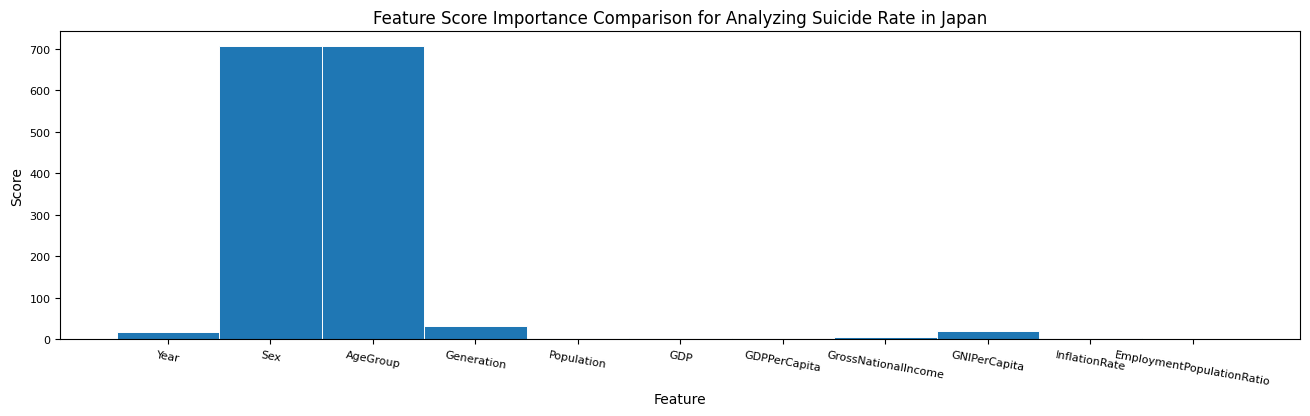

In [243]:
plt.figure(figsize=(16, 4))

plt.bar(featureScores["Specs"], featureScores["Score"], width=1, edgecolor="white", linewidth=0.7)

plt.title("Feature Score Importance Comparison for Analyzing Suicide Rate in Japan")

plt.xlabel("Feature")
plt.ylabel("Score")
plt.xticks(rotation=350)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.show()

In [223]:
# Choose only top 5 from previous scoring

selected_features = ["Sex", "AgeGroup", "Generation", "GNIPerCapita", "Year"] 